# Exploratory Data Analysis of Datasets

In [1]:
import gensim
import logging
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

In [4]:
unique_books_df = pd.read_csv('unique_books.csv')
#this includes only information about books and not users

In [5]:
unique_books_df.shape

(4327, 18)

In [6]:
unique_books_df.head()

,Unnamed: 0,user_id,book_id,rating,SortIndex1,SortIndex2,goodreads_book_id,isbn,isbn13,original_title,average_rating,ratings_count,book_authors,book_desc,book_isbn,book_title,genres,book_desc_tok
0,0,2,2318,3,41929,398,998.0,671015206,9.780671e+12,The Millionaire Next Door: The Surprising Secr...,4.00,43937.0,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,9.780670e+12,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...
1,389,2,26,4,41929,227,968.0,307277674,9.780307e+12,The Da Vinci Code,3.79,1447148.0,['Dan Brown'],An ingenious code hidden in the works of Leona...,9.780310e+12,The Da Vinci Code,"['Fiction', 'Mystery', 'Thriller']",an ingenious code hidden in t...
2,13461,2,315,3,41929,193,4894.0,91883768,9.780092e+12,Who Moved My Cheese?,3.74,237272.0,"['Spencer Johnson', 'Kenneth H. Blanchard']","Written by Spencer Johnson, coauthor of The On...",9.780090e+12,Who Moved My Cheese?,"['Business', 'Self Help', 'Nonfiction', 'Psych...",written by spencer johnson ...
3,15287,2,33,4,41929,98,930.0,739326228,9.780739e+12,Memoirs of a Geisha,4.08,1300209.0,['Arthur Golden'],"A literary sensation and runaway bestseller, t...",9.780740e+12,Memoirs of a Geisha,"['Fiction', 'Historical', 'Historical Fiction'...",a literary sensation and runaway...
4,49199,2,301,5,41929,194,4900.0,1892295490,9.781892e+12,Heart of Darkness,3.42,255576.0,['Joseph Conrad'],Dark allegory describes the narrator's journey...,9.781890e+12,Heart of Darkness,"['Classics', 'Fiction', 'Literature', 'Cultura...",dark allegory describes the narr...


In [3]:
complete_df = pd.read_csv('final_books_dataset_lang_clean.csv')
#this includes user and ratings data for the books in the unique dataset above

/home/vkanoria/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
complete_df.shape

(6863793, 18)

In [7]:
complete_df.head()

,Unnamed: 0,user_id,book_id,rating,SortIndex1,SortIndex2,goodreads_book_id,isbn,isbn13,original_title,average_rating,ratings_count,book_authors,book_desc,book_isbn,book_title,genres,book_desc_tok
0,0,2,2318,3,41929,398,998.0,671015206,9.780671e+12,The Millionaire Next Door: The Surprising Secr...,4.0,43937.0,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,9.780670e+12,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...
1,1,953,2318,5,31784,108,998.0,671015206,9.780671e+12,The Millionaire Next Door: The Surprising Secr...,4.0,43937.0,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,9.780670e+12,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...
2,2,979,2318,2,47245,187,998.0,671015206,9.780671e+12,The Millionaire Next Door: The Surprising Secr...,4.0,43937.0,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,9.780670e+12,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...
3,3,793,2318,3,27030,58,998.0,671015206,9.780671e+12,The Millionaire Next Door: The Surprising Secr...,4.0,43937.0,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,9.780670e+12,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...
4,4,190,2318,4,19863,454,998.0,671015206,9.780671e+12,The Millionaire Next Door: The Surprising Secr...,4.0,43937.0,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,9.780670e+12,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...


<AxesSubplot:ylabel='Frequency'>

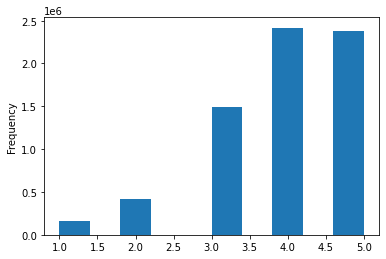

In [9]:
complete_df['rating'].plot(kind='hist')

## On average, how many books does each person rate?

How many unique users are there?

In [10]:
len(complete_df['user_id'].unique())

53417

Average number of books rated by each person = (total number of ratings)/(total number of unique users)

In [11]:
complete_df.shape[0]/len((complete_df['user_id'].unique()))

128.49454293576952

Therefore, average number of books rated by each person $\approx$ 128.5

## A plot of number of ratings by user

<AxesSubplot:ylabel='Frequency'>

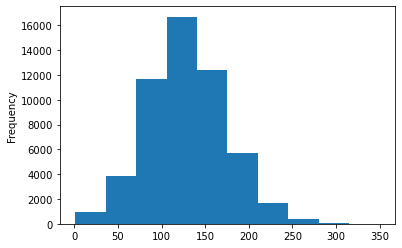

In [15]:
complete_df.groupby('user_id')['rating'].count().plot(kind='hist')

In [16]:
#Min number of ratings by users:
complete_df.groupby('user_id')['rating'].count().min()

1

In [17]:
#Max number of ratings by users:
complete_df.groupby('user_id')['rating'].count().max()

350

In [18]:
#Median number of ratings by users:
complete_df.groupby('user_id')['rating'].count().median()

127.0

In [53]:
#Standard deviation of number of ratings by users:
complete_df.groupby('user_id')['rating'].count().std()

44.872046270809065

## On average, how many ratings does each book have?

How many unique books are there?

In [22]:
len(complete_df['book_id'].unique())

4439

Average number of ratings associated with a book = (total number of ratings)/(total number of books)

In [23]:
complete_df.shape[0]/len(complete_df['book_id'].unique())

1546.2475782833972

Therefore, average number of books rated by each person $\approx$ 1546.25

## A plot of number of ratings by book

<AxesSubplot:ylabel='Frequency'>

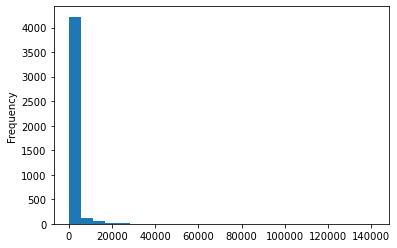

In [27]:
complete_df.groupby('book_id')['rating'].count().plot(kind='hist', bins=25)

### Zooming in..

In [28]:
ratings_freq_df = complete_df.groupby('book_id')['rating'].count()

In [35]:
ratings_freq_df

book_id
3       118517
4        76352
5        83020
6        56320
8        57888
         ...  
9991       122
9992       112
9996       141
9998       102
9999       130
Name: rating, Length: 4439, dtype: int64

<AxesSubplot:ylabel='Frequency'>

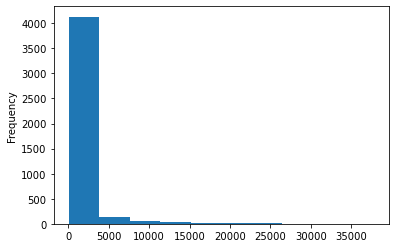

In [37]:
ratings_freq_df[ratings_freq_df<40000].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

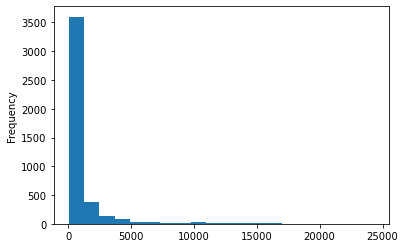

In [43]:
ratings_freq_df[ratings_freq_df<=25000].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

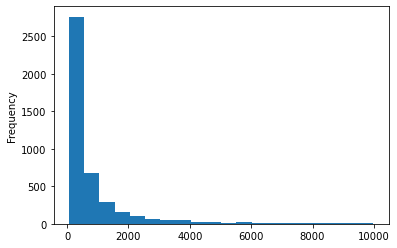

In [41]:
ratings_freq_df[ratings_freq_df<=10000].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

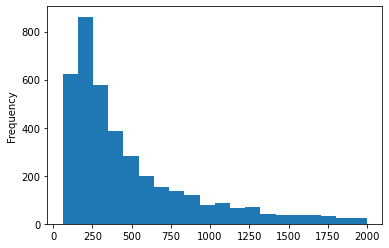

In [44]:
ratings_freq_df[ratings_freq_df<=2000].plot(kind='hist', bins=20)

The distribution is very skewed.

In [45]:
len(ratings_freq_df[ratings_freq_df<=2000])

3869

### So 3869 of 4439 books have ratings less than 2000 in count.

In [46]:
#Min number of ratings by users:
complete_df.groupby('book_id')['rating'].count().min()

60

In [47]:
#Max number of ratings by users:
complete_df.groupby('book_id')['rating'].count().max()

140913

In [48]:
#Median number of ratings by users:
complete_df.groupby('book_id')['rating'].count().median()

387.0

In [54]:
#Standard deviation of number of ratings by users:
complete_df.groupby('book_id')['rating'].count().std()

5898.987318070273

Thus, **minimum number of ratings that a book has = 60**


**Maximum number of ratings that a book has = 140913**

**Median number of ratings that a book has = 387**

**Standard deviation of ratings that a book has $\approx$ 5899**